<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
<p>
Cette étude a été réalisée dans le cadre du 4eme projet de ma formation Datascientist dispensée en MOOC par 
**<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>**.
</p>    

<p>
Ce notebook présente un modèle de prédiction des retards d'avions. 
</p>
<p>
Le modèle se base sur les données fournies par le site :
</p>
<p>
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
</p>
<p>
</p>
</font>

# <font color='blus'> Synthèse du 24/05/2018</font>

## <font color='blue'>Nature du pb à résoudre</font>
* Problème de prédiction.
* Orientation vers un algorithme de régression.

## <font color='blue'>Acquisition des données</font>
* Problème de débordement mémoire

## <font color='blue'>Préparation des données</font>
* Traitement des valeurs a Nan

## <font color='blue'>Analyse exploratoire</font>
Objectifs: appréhender la nature du problème à résoudre pour s'orienter vers des modèles de prédictions.
* Correlations
* Analyse en composantes principales :  quelles sont les variables qui expliquent le plus la variance? Réduction de dimension possible?

## <font color='blue'>Evaluation des modèles de prédiction</font>
* Modèle linéaire : basé sur une combinaison linéaire des variables.__Comment justifier l'hyopthèse de linéarité?__
* Choix des hyper-paramètres : Grid search
* Entraînement des modèles : validation croisée
* Prédiction des retards avec un score : prédiction de la valeur du retard
* Prédiction binaire du retard : en retard / pas en retard
* Comparaison des performances avec des modèles naïfs.
* Augmentation de la performance des algorithmes évalués

## <font color='blue'>Choix du modèle de prédiction</font>


* Anticiper les retards : retard = heure atterissage - heure prévue.
* Créer la colonne avant la séparation et supprimer la colonne dont elle dépend. Sinon phénomène de __DATA LEAKAGE__. *En effet, si on utilise deux variables pour en créer une 3eme, alors lorsque l'on va prédire, à un instant dans le futur, une valeur pour cette 3eme variable, les valeurs des 2 variables utilisées ne seront plus valables au moment de la prédiction. Les variables ayant servies à créer cette nouvelle variable doivent être **exclues du modèle**.*.

* Les étiquettes sont a valeurs dans les réels. On utilisera donc une regression linéaire pour la prédiction des retards.

* Après modélisation, si la mtrice X.T.dot(X) est inversible, alors le pb admet une solution unique et explicite, issue de la maximisation de la vraissemblance du modèle, i.e, la maximisation de la probabilité de calculer la valeur de la cible (ici, pour ce problème, les retards).

* Technique courante sur les lignes : définir les indices das un vecteur modele réduit Etudier l'impact de la taille des données d'entraînement sur la qualité de la prédiction. 20%, 40%, 30% de l'entraînement et regarder la performance.
* Supprimer les colones qui n'apporent rien a la prediction
* Regression : foncton de out a optimiser va inclure les coeff de Ridge de et Lasso Initialement, sans regularisation. Par la suite, essayer la recherche d'hyper-paramètres l1 et l2 qui controlent Ridge et Lasso. __Coder une seule loss__ qui jauge l'effet de la régularisation L1 et L2. __==> utiliser la regression elestic net.__

* Conclusion : jouer le jeux de test et évaluer l'erreur quadratique.

* __Le pb est formulé en prédiction__ : entraîner un modele sur Janv--> mars, essayer sur Avril. Ce, pour répondre a la probléamatique : évaluer les retards dans le futur.
* Entraîner surr 15 premiers jours et tester sur les derniers jours.





# <font color='blus'> Synthèse du 19/05/2018</font>

## <font color='blue'>Acquisition des données</font>
* Exploration des données et modèle sur un mois

## <font color='blue'>Préparation des données</font>
* Traitement des valeurs a Nan remplacées par la valeur moyenne dans le vecteur étiquette 
* Mises a 0 sur les autres données.

## <font color='blue'>Analyse exploratoire</font>
Objectifs: appréhender la nature du problème à résoudre pour s'orienter vers des modèles de prédictions.
* Correlations : données corrélées sur les retards ==> élimination des colonnes corrélées?

## <font color='blue'>Evaluation d'un modèle de prédiciton binaire : KNN</font>
* Choix des hyper-paramètres : Grid search
* Entraînement des modèles : validation croisée
* Affichage des performances du modèle : MSE et matrice de confusion

## <font color='blue'>Modèle de prédiction par regression : SVR </font>
* Données d'entraînement : sur un mois, les 3 premières semaines.
* Regression linéaire par vecteur de support





# <font color='blues'>Acquisition des données</font>

__Loading Python lib used for project__

In [1]:
import pandas as pd
from p3_util import *
from p3_util_plot import *

__Data loading initialization with 1st month__

In [2]:
path_name = "./data/Dataset+Projet+4/2016"
month = '03'

path_name_month = path_name+"_"+str(month)+".csv"
df_dealays = pd.read_csv(path_name_month, delimiter=',',low_memory=False)
print("Month "+month+" loaded!")
print(df_dealays.shape)

Month 03 loaded!
(479122, 65)


__Loading remainings month__

In [3]:
print(df_dealays.shape)
print(df_dealays.columns)


(479122, 65)
Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', '

In [4]:
sampling=10
df_dealays.CARRIER_DELAY.sample(sampling),\
df_dealays.WEATHER_DELAY.sample(sampling),\
df_dealays.NAS_DELAY.sample(sampling),\
df_dealays.SECURITY_DELAY.sample(sampling),\
df_dealays.LATE_AIRCRAFT_DELAY.sample(sampling)

(96760      NaN
 384670     NaN
 470819     NaN
 363504     NaN
 195587     NaN
 214907    11.0
 374047     NaN
 219589     NaN
 195655     0.0
 107416     NaN
 Name: CARRIER_DELAY, dtype: float64, 35880     NaN
 430568    NaN
 89064     NaN
 219327    NaN
 289098    NaN
 416851    NaN
 191295    NaN
 90288     0.0
 324151    NaN
 463423    0.0
 Name: WEATHER_DELAY, dtype: float64, 471591    0.0
 153567    NaN
 234236    NaN
 100405    0.0
 183200    NaN
 290177    NaN
 286426    NaN
 46690     NaN
 458901    NaN
 383067    NaN
 Name: NAS_DELAY, dtype: float64, 449464   NaN
 93579    NaN
 71852    NaN
 287578   NaN
 122432   NaN
 384787   NaN
 326197   NaN
 428657   NaN
 24478    NaN
 291669   NaN
 Name: SECURITY_DELAY, dtype: float64, 339144    NaN
 257759    0.0
 317467    NaN
 31908     NaN
 120549    NaN
 72402     NaN
 441074    NaN
 82305     NaN
 158735    NaN
 3928      NaN
 Name: LATE_AIRCRAFT_DELAY, dtype: float64)

# <font color='blues'>Data preparation</font>

__Nan values processing__

In [5]:
# Getting digital dataframe with ditigal columns only
print(df_dealays.shape)

df_dealays_digit,list_col_notdigit = df_get_digital_columns(df_dealays) 
print(df_dealays_digit.shape)
print(list_col_notdigit)


(479122, 65)
(479122, 50)
['FL_DATE', 'UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEP_TIME_BLK', 'ARR_TIME_BLK', 'CANCELLATION_CODE']


In [6]:
df_dealays_digit_sample = df_dealays_digit.sample(int(df_dealays.shape[0]/10))

df_dealays_digit_sample.columns
df_dealays_digit_sample_restricted = df_dealays_digit_sample.iloc[:,:-9]
df_dealays_digit_sample_restricted.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID',
       'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_FIPS', 'ORIGIN_WAC',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP'],
      dtype='object')

In [7]:
df_dealays_digit_sample_cleaned , list_dropped_unique= df_clean_nan(df_dealays_digit_sample_restricted, verbose=True, action=True)
list_dropped_unique

DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan
DEP_TIME nan

ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
ARR_DELAY nan
Number of droped raws = 635


['DEP_TIME', 'TAXI_OUT', 'WHEELS_ON', 'ARR_DELAY']

# <font color='blues'>Exploratory analysis</font>

__ PCA : data are scaled __

In [8]:
list_dropped_unique

['DEP_TIME', 'TAXI_OUT', 'WHEELS_ON', 'ARR_DELAY']

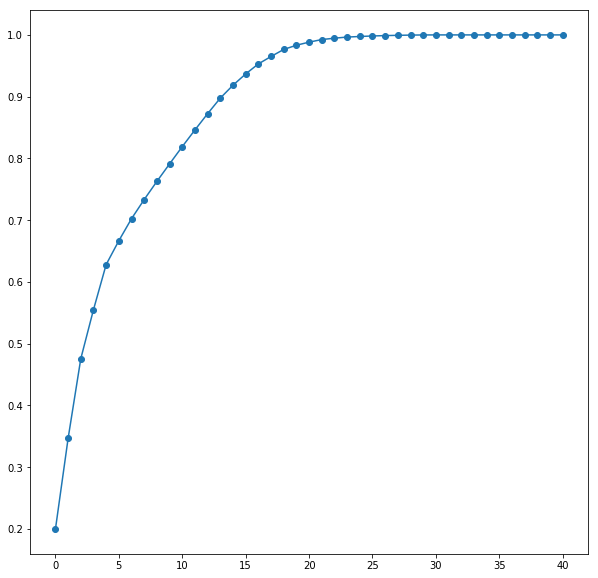

In [9]:
X_scaled_ = df_pca_all_plot(df_dealays_digit_sample_cleaned)

In [10]:
# Get standardized data
X_scaled = df_get_std_scaled_values(df_dealays_digit_sample_cleaned)

#Build PCA algorithme.
nb_components = 2
pca = PCA(n_components=nb_components)
pca.fit(X_scaled)

X_projected = pca.transform(X_scaled)
print(X_projected.shape)


(47277, 2)


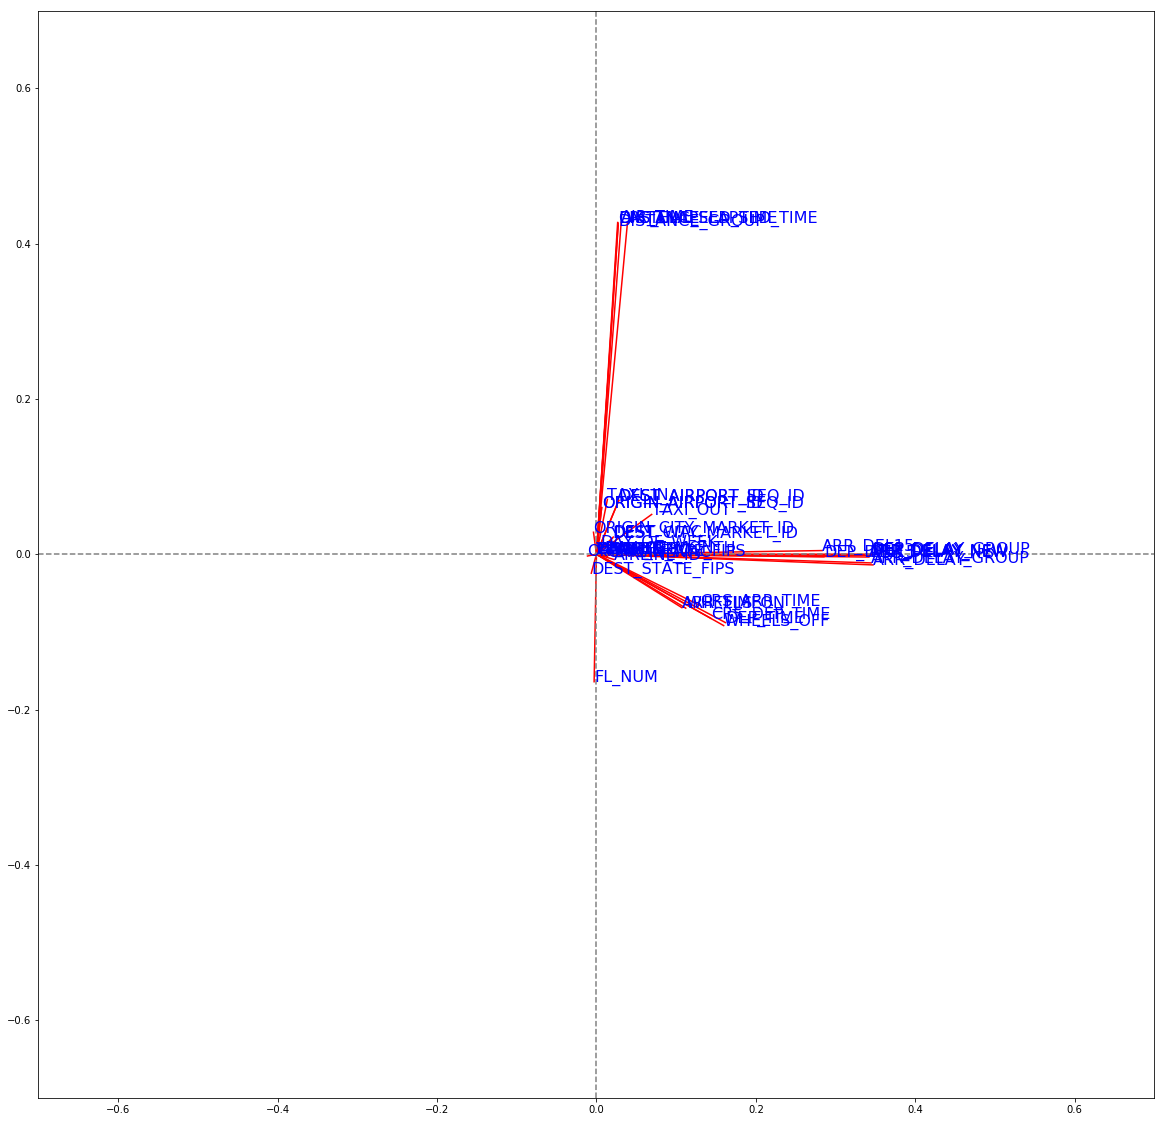

In [11]:
df_pcs2_plot(df_dealays_digit_sample_cleaned, pca)

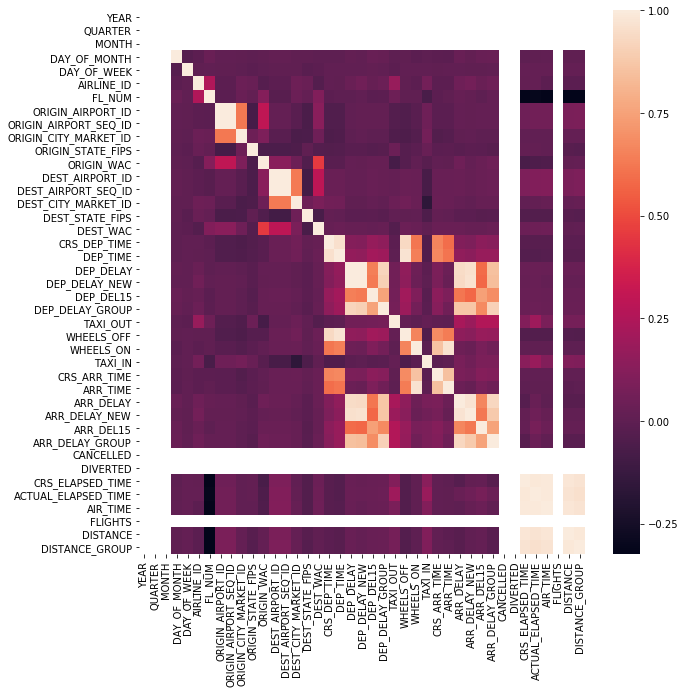

In [12]:
df_dealays_digit_sample_cleaned_corr = df_dealays_digit_sample_cleaned.corr()
f, ax = plt.subplots(figsize=(10, 10))
_z = sns.heatmap(df_dealays_digit_sample_cleaned_corr, annot=False)

## <font color='blue'>Analyse des variables liées aux retards</font>

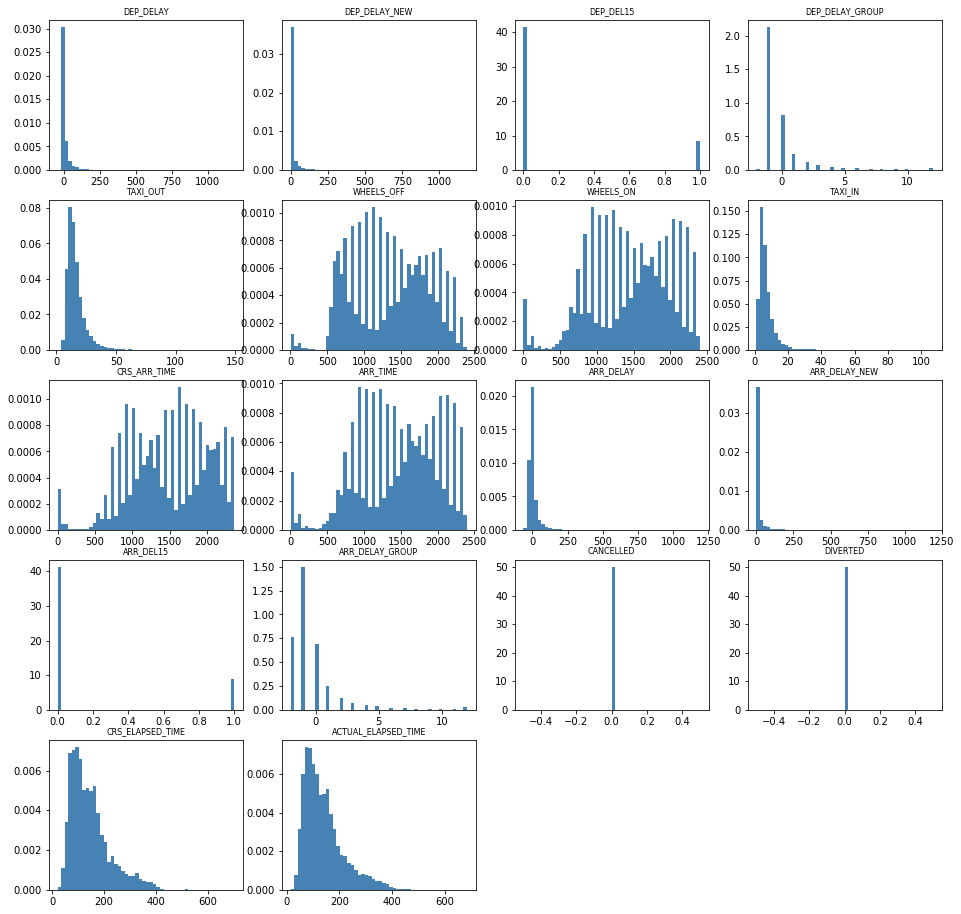

In [13]:
fig = plt.figure(figsize=(16, 16))
list_data= ['DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME']
if True :
    for pos in range(len(list_data)) :
        item = list_data[pos]
        X = df_dealays_digit_sample_cleaned[item]
        ax = fig.add_subplot(5,4, (pos+1))
        h = ax.hist(X, bins=50, color='steelblue', edgecolor='none', normed=True)
        ax.set_title(item, fontsize=8)
    

__Corrrelation des varables liées aux retards__

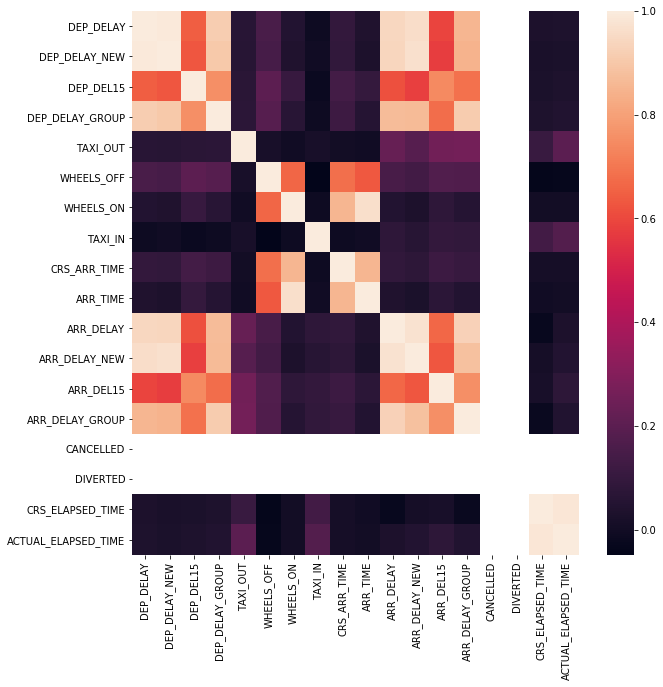

In [14]:
list_data
df = pd.DataFrame()
ser1 = df_dealays_digit_sample_cleaned['DEP_DELAY']

ser2 = df_dealays_digit_sample_cleaned['ACTUAL_ELAPSED_TIME']
result = pd.concat([ser1, ser2], axis=1)
for column in list_data :
    ser = df_dealays_digit_sample_cleaned[column]
    df = pd.concat([df, ser], axis=1)

    
df_corr = df.corr()    

f, ax = plt.subplots(figsize=(10, 10))
_z = sns.heatmap(df_corr, annot=False)

# <font color='blues'>Classification binaire KNN : ARR_DELAY </font>

__Imputation des valeurs a la moyenne pour la classe binaire issue de la colonne ARR_DELAY__

In [15]:
ser_delay = df_dealays_digit_sample_restricted.ARR_DELAY
arr_delay = np.array(ser_delay)
where_nan_index = np.isnan(arr_delay)

array_delay_sum = np.nansum(arr_delay)
mean_delay_sum = array_delay_sum/len(arr_delay)

arr_delay[where_nan_index] = mean_delay_sum

In [16]:
df_dealays_digit_sample_restricted.shape

(47912, 41)

__Creation de la classe binaire : retard ou pas__

In [17]:
y = np.where(arr_delay>0,1,-1)

__Imputation des valeurs indéfinies à 0 dans le dataframe__

In [18]:
df = df_dealays_digit_sample_restricted.fillna(value=0)

__Purge de la colonne ARR_DELAY__

In [19]:
print(df.shape)
X = df.drop(labels='ARR_DELAY', axis=1)
print(X.shape)

(47912, 41)
(47912, 40)


__Création des jeux de données d'entraînement et de test sur des données standardisées__

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

__Standardisation des données__

In [21]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

__Recherche du nb de voisins optimum du KNN par validation croisée__

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#-----------------------------------------------------------------------------------
# Creation d'une liste de nombre de voisins impairs
#-----------------------------------------------------------------------------------
myList = list(range(3,6))

neighbors = filter(lambda x: x % 2 != 0, myList)
list_neighbors = list(neighbors)

#-----------------------------------------------------------------------------------
# Liste contenant les scores moyens de la recherche croisée (CV)
#-----------------------------------------------------------------------------------
list_cv_mean_scores = list()

min_index = 0
scores_mean = 0.0
import time
t0 = time.time()
# Recherche du nombre de voisins optimumss
for k in list_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_clf, X_train_std, y_train, cv=5, scoring='accuracy')
    list_cv_mean_scores.append(scores.mean())
print("KNN : recherche du nombre de voisins optimum = %0.3fs" % (time.time()-t0))

#-----------------------------------------------------------------------------------
# Erreur de classification minimale
#-----------------------------------------------------------------------------------
list_mse = [1 - x for x in list_cv_mean_scores]
min_index = list_mse.index(min(list_mse))

#-----------------------------------------------------------------------------------
# Extraction du meilleur nombre de voisins
#-----------------------------------------------------------------------------------
optimal_k = list_neighbors[min_index]
print( "Le nombre optimal de voisins est %d" % optimal_k)


KNN : recherche du nombre de voisins optimum = 171.401s
Le nombre optimal de voisins est 5


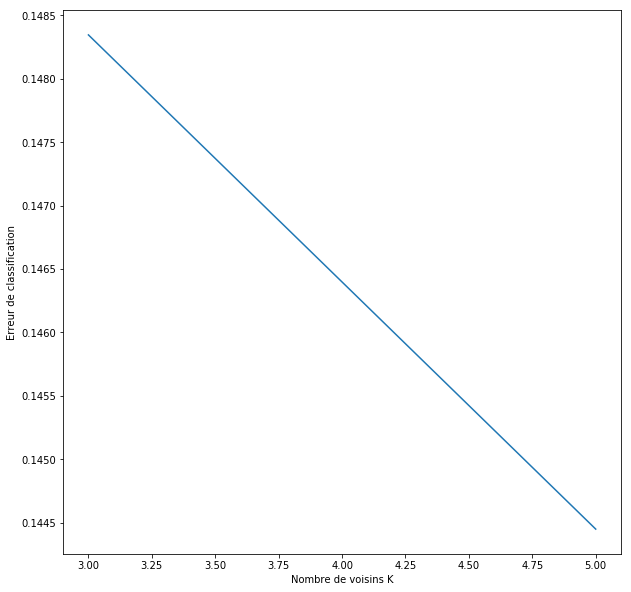

In [23]:

# plot misclassification error vs k
plt.figure(figsize=(10,10))
plt.plot(list_neighbors, list_mse)
plt.xlabel('Nombre de voisins K')
plt.ylabel('Erreur de classification')
plt.show()

__Prédictions avec un classifieur KNN optimal__

In [24]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
t0 = time.time()
knn_clf.fit(X_train_std, y_train)
t1 = time.time()
print("Apprentissage KNN réalisé en %0.3Fs" % (t1-t0))
y_pred_knn = knn_clf.predict(X_test_std)
print("Meilleur score pour la classification KNN : %0.4F" % accuracy_score(y_test, y_pred_knn))

Apprentissage KNN réalisé en 1.835s
Meilleur score pour la classification KNN : 0.8585


__Affichage des scores du classificateur binaire__

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(y_test.shape)
class_names=['RETARD','PONCTUEL']
print(classification_report(y_test, y_pred_knn,target_names=class_names))

(15811,)
             precision    recall  f1-score   support

     RETARD       0.84      0.97      0.90     10176
   PONCTUEL       0.92      0.66      0.77      5635

avg / total       0.87      0.86      0.85     15811



__Affichage graphique de la matrice de confusions__

In [26]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[0.96688286 0.03311714]
 [0.33717835 0.66282165]]


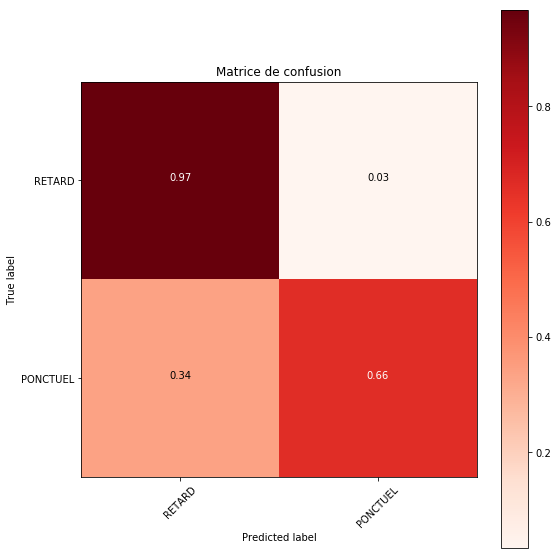

In [27]:
conf = confusion_matrix(y_test, y_pred_knn )
#print(conf)
plot_confusion_matrix(conf, class_names,
                          normalize=True,
                          title='Matrice de confusion',
                          cmap=plt.cm.Reds)

# <font color='blues'>Classification binaire KNN : calcul du retard </font>

In [28]:
df_dealays_digit_sample_restricted.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID',
       'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_FIPS', 'ORIGIN_WAC',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP'],
      dtype='object')

## <font color='blue'>Groupement des résultats par airline ID</font>

__Recupération des identifiants de compagines__

In [29]:
arr_airline_id = df_dealays_digit_sample_restricted.AIRLINE_ID.unique()

__Stockage des DF dans un dictionnaire de compagnies__

In [79]:
dict_df_aid=dict()
df = df_dealays_digit_sample_restricted.copy()
for aid in arr_airline_id :
    dict_df_aid[aid] = df[df['AIRLINE_ID']==aid]

__Classifieur KNN : recherche du meilleur nombre de voisins pour le dernier aid__

In [80]:
df_aid = dict_df_aid[aid]
df_aid.columns
#df_aid['DAY_OF_MONTH']

245861    18
243878    25
245513     5
245378    25
245816    27
245455     9
247828    23
246085    19
244834    30
243809    25
244392     8
249104    24
242243    14
247743    23
243389     6
246447    28
245649    18
244856     9
247767    16
248878    15
245158    27
246534     2
245407    23
244927     6
246120    23
244885    26
243180     8
242683    12
242439    16
249309    24
          ..
246408    17
245028     2
244806    21
242455     1
243825     3
242442    19
243529    15
244285     8
243331    29
248906    24
243657    24
248074    22
240600    31
244890    31
244929     8
245267    25
241879    17
249163    24
242160    24
249112     1
245052    26
242139     3
241999    18
247934    22
243093    21
245581    29
246141    13
245999    26
245398    14
247603    26
Name: DAY_OF_MONTH, Length: 631, dtype: int64

In [32]:
ser_delay = df_aid.ARR_DELAY
arr_delay = np.array(ser_delay)
where_nan_index = np.isnan(arr_delay)

array_delay_sum = np.nansum(arr_delay)
mean_delay_sum = array_delay_sum/len(arr_delay)

arr_delay[where_nan_index] = mean_delay_sum

__Creation de la classe binaire : retard ou pas__

In [33]:
y_aid = np.where(arr_delay>0,1,-1)

__Imputation des valeurs indéfinies à 0 dans le dataframe__

In [34]:
df_aid = df_aid.fillna(value=0)

__Purge de la colonne ARR_DELAY__

In [35]:
print(df_aid.shape)
X_aid = df_aid.drop(labels='ARR_DELAY', axis=1)
print(X_aid.shape)

(631, 41)
(631, 40)


__Création des jeux de données d'entraînement et de test sur des données standardisées__

In [36]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train_aid, X_test_aid, y_train_aid, y_test_aid = train_test_split(X_aid, y_aid, test_size=0.20)

__Standardisation des données__

In [37]:
std_scale = preprocessing.StandardScaler().fit(X_train_aid)
X_train_aid_std = std_scale.transform(X_train_aid)
X_test_aid_std = std_scale.transform(X_test_aid)

In [38]:
best_neighbors = knn_cv_search(X_train_aid_std, y_train_aid, list_neighbors=None, cv_parameter=5\
   , scoring_parameter='accuracy')

KNN classifier: Elapsed time for searching best neighbors number= 0.054s
Optimal number for neighbors= 3


In [39]:
knn_clf = KNeighborsClassifier(n_neighbors=best_neighbors)
t0 = time.time()
knn_clf.fit(X_train_aid_std, y_train_aid)
t1 = time.time()
print("Apprentissage KNN réalisé en %0.3Fs" % (t1-t0))
y_pred_aid_knn = knn_clf.predict(X_test_aid_std)
print("Meilleur score pour la classification KNN de la compagine= {} : {}".format(aid,accuracy_score(y_test_aid, y_pred_aid_knn)))

Apprentissage KNN réalisé en 0.003s
Meilleur score pour la classification KNN de la compagine= 19690 : 0.8582677165354331


Normalized confusion matrix
[[0.93975904 0.06024096]
 [0.29545455 0.70454545]]


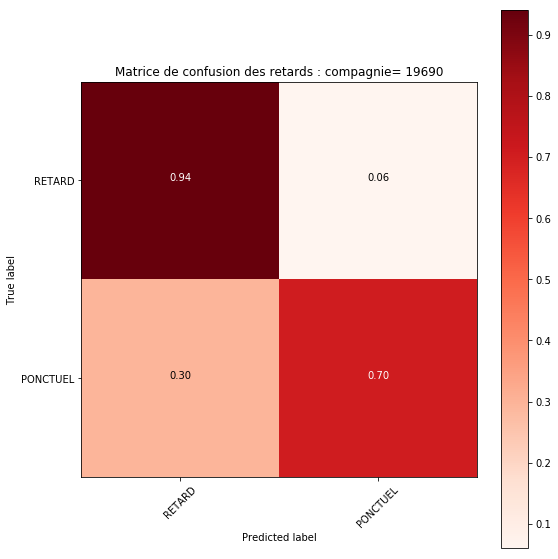

In [40]:
conf = confusion_matrix(y_test_aid, y_pred_aid_knn )
class_names=['RETARD','PONCTUEL']
title_aid = 'Matrice de confusion des retards : compagnie= {}'.format(aid)

if True :
    plot_confusion_matrix(conf, class_names,
                              normalize=True,
                              title = title_aid,
                              cmap=plt.cm.Reds)

# <font color='blues'>Regression sur les valeurs des retards </font>

## <font color='blue'>Modèle de regression SVR</font>

__Validation des hypothèses: __
* Bruit est normal
* Obervations sont indépendantes et identiquement distribués
* Pb est linéaire : les réalisations (X,y) doivent être rendues indépendantes les unes des autres

### <font color='blue'>Contruction d'un vecteur d'étiquettes</font>

In [82]:
# Recherche du dataframe avec le max de lignes
if False :
    max_aid = 0
    for aid in dict_df_aid.keys() :    
        if dict_df_aid[aid].shape[0] > max_aid :
            max_aid = aid

    df_aid = dict_df_aid[max_aid]
df_aid.shape
df_aid['DAY_OF_MONTH']


245861    18
243878    25
245513     5
245378    25
245816    27
245455     9
247828    23
246085    19
244834    30
243809    25
244392     8
249104    24
242243    14
247743    23
243389     6
246447    28
245649    18
244856     9
247767    16
248878    15
245158    27
246534     2
245407    23
244927     6
246120    23
244885    26
243180     8
242683    12
242439    16
249309    24
          ..
246408    17
245028     2
244806    21
242455     1
243825     3
242442    19
243529    15
244285     8
243331    29
248906    24
243657    24
248074    22
240600    31
244890    31
244929     8
245267    25
241879    17
249163    24
242160    24
249112     1
245052    26
242139     3
241999    18
247934    22
243093    21
245581    29
246141    13
245999    26
245398    14
247603    26
Name: DAY_OF_MONTH, Length: 631, dtype: int64

__Traitement des valeurs a Nan par imputation de la valeur médiane__

In [84]:
df_aid_save = df_aid.copy()

In [91]:
df_aid = df_aid_save.copy()
if False :
    for column in df_aid.columns :
        ser = df_aid[column]
        #median = ser.median()
        arr_ser = np.array(ser)
        where_nan_index = np.isnan(arr_ser)

        array_sum = np.nansum(arr_ser)
        mean_delay_sum = array_sum/len(arr_ser)

        arr_ser[where_nan_index] = mean_delay_sum
        df_aid[column] = pd.Series(arr_delay)
else :
    df_aid = df_aid.fillna(value=0)

In [92]:
df_aid.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID',
       'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_FIPS', 'ORIGIN_WAC',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP'],
      dtype='object')

__Récupération des variables corréles selon un seuil__

In [93]:
df_aid.shape
df_aid['DAY_OF_MONTH']

245861    18
243878    25
245513     5
245378    25
245816    27
245455     9
247828    23
246085    19
244834    30
243809    25
244392     8
249104    24
242243    14
247743    23
243389     6
246447    28
245649    18
244856     9
247767    16
248878    15
245158    27
246534     2
245407    23
244927     6
246120    23
244885    26
243180     8
242683    12
242439    16
249309    24
          ..
246408    17
245028     2
244806    21
242455     1
243825     3
242442    19
243529    15
244285     8
243331    29
248906    24
243657    24
248074    22
240600    31
244890    31
244929     8
245267    25
241879    17
249163    24
242160    24
249112     1
245052    26
242139     3
241999    18
247934    22
243093    21
245581    29
246141    13
245999    26
245398    14
247603    26
Name: DAY_OF_MONTH, Length: 631, dtype: int64

In [94]:
df_aid_corr = df_aid.corr()
df_aid_corr.shape

(41, 41)

In [97]:
correlation_threshold_value = 0.9
dict_dict_value_threshold = get_dict_dict_value_threshold(df_aid_corr, threshold = correlation_threshold_value)

In [98]:
dict_dict_value_threshold

{'ACTUAL_ELAPSED_TIME': {'AIR_TIME': 0.999184037433879,
  'CRS_ELAPSED_TIME': 0.9977224936528558,
  'DISTANCE': 0.9909860957471343,
  'DISTANCE_GROUP': 0.9664042393018741},
 'AIR_TIME': {'ACTUAL_ELAPSED_TIME': 0.999184037433879,
  'CRS_ELAPSED_TIME': 0.9980789007475703,
  'DISTANCE': 0.9915591522379733,
  'DISTANCE_GROUP': 0.9654528995639831},
 'ARR_DELAY': {'ARR_DELAY_GROUP': 0.9415201356948637},
 'ARR_DELAY_GROUP': {'ARR_DELAY': 0.9415201356948637},
 'ARR_TIME': {'CRS_ARR_TIME': 0.9663529983305161,
  'WHEELS_ON': 0.9995133492297418},
 'CRS_ARR_TIME': {'ARR_TIME': 0.9663529983305161,
  'WHEELS_ON': 0.9662479811701024},
 'CRS_DEP_TIME': {'DEP_TIME': 0.9987733746160348,
  'WHEELS_OFF': 0.9986949352667852},
 'CRS_ELAPSED_TIME': {'ACTUAL_ELAPSED_TIME': 0.9977224936528558,
  'AIR_TIME': 0.9980789007475703,
  'DISTANCE': 0.9944626048004753,
  'DISTANCE_GROUP': 0.9710187439563127},
 'DEP_DELAY': {'DEP_DELAY_GROUP': 0.9461763048145436,
  'DEP_DELAY_NEW': 0.9573867042083861},
 'DEP_DELAY_GROUP

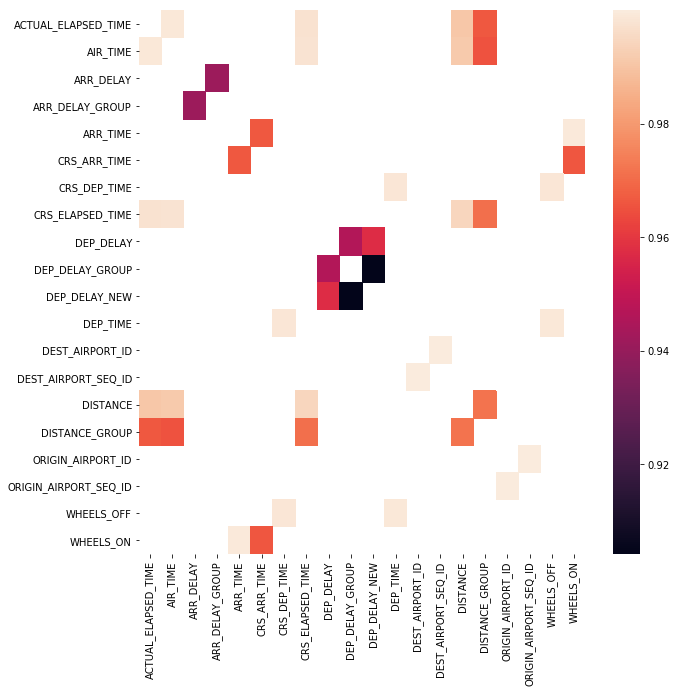

In [99]:
df_corr = pd.DataFrame(dict_dict_value_threshold) 

f, ax = plt.subplots(figsize=(10, 10))
_z = sns.heatmap(df_corr, annot=False)

__Vecteur des étiquettes __

In [100]:
df_aid_droped = df_aid.copy()
df_aid_droped['LABEL'] = df_aid['CRS_ARR_TIME'] - df_aid['ARR_TIME']

__Purge des colonnes ayant servies a calculer les étiquettes__

In [101]:
df_aid_droped.drop(labels='CRS_ARR_TIME', axis=1, inplace=True)
df_aid_droped.drop(labels='ARR_TIME', axis=1, inplace=True)

__Calcul des données des jeux d'entraînement et de test __

In [102]:
X_aid_train = df_aid_droped[df_aid_droped['DAY_OF_MONTH']<=20]
y_aid_train = df_aid_droped[df_aid_droped['DAY_OF_MONTH']<=20]['LABEL']

X_aid_test = df_aid_droped[df_aid_droped['DAY_OF_MONTH']>20]
y_aid_test = df_aid_droped[df_aid_droped['DAY_OF_MONTH']>20]['LABEL']
df_aid_droped['DAY_OF_MONTH']

245861    18
243878    25
245513     5
245378    25
245816    27
245455     9
247828    23
246085    19
244834    30
243809    25
244392     8
249104    24
242243    14
247743    23
243389     6
246447    28
245649    18
244856     9
247767    16
248878    15
245158    27
246534     2
245407    23
244927     6
246120    23
244885    26
243180     8
242683    12
242439    16
249309    24
          ..
246408    17
245028     2
244806    21
242455     1
243825     3
242442    19
243529    15
244285     8
243331    29
248906    24
243657    24
248074    22
240600    31
244890    31
244929     8
245267    25
241879    17
249163    24
242160    24
249112     1
245052    26
242139     3
241999    18
247934    22
243093    21
245581    29
246141    13
245999    26
245398    14
247603    26
Name: DAY_OF_MONTH, Length: 631, dtype: int64

In [103]:
X_aid_train = X_aid_train.drop(labels='LABEL', axis=1, inplace=False)
X_aid_train = X_aid_train.drop(labels='DAY_OF_MONTH', axis=1, inplace=False)

X_aid_test = X_aid_test.drop(labels='LABEL', axis=1, inplace=False)
X_aid_test = X_aid_test.drop(labels='DAY_OF_MONTH', axis=1, inplace=False)

In [104]:
X_aid_train.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS',
       'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP'],
      dtype='object')

In [105]:
y_aid_train.shape, y_aid_test.shape

((388,), (243,))

__Standardisation des données__

In [106]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_aid_train)
X_aid_train_std = std_scale.transform(X_aid_train)

std_scale = preprocessing.StandardScaler().fit(X_aid_test)
X_test_aid_std = std_scale.transform(X_aid_test)

In [107]:
X_aid_train_std.shape, y_aid_train.shape

((388, 38), (388,))

__Classificateur linéaire : SVC__

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
import time

lsvr_clf = LinearSVR()
param_grid = {'C':[1,2,3,4,5], 'multi_class': ['ovr','crammer_singer'] }
grid_svr = GridSearchCV(lsvr_clf, param_grid, refit=True)
t0 = time.time()
grid_svr.fit(X_aid_train_std, y_aid_train)
print("Recherche des hyper-paramètres en %0.3fs" % (time.time() - t0))
print("Meilleurs hyper-paramètres pour le classifieur LinearSVC: "+str(grid_svr.best_params_))


ValueError: Invalid parameter multi_class for estimator LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0). Check the list of available parameters with `estimator.get_params().keys()`.